## Presentado por: 
$Angélica$ $María$ $Gómez$ $Buitrago$

**Cód: 201026897**

## Exercise 05

# Neural networks

## 4.1 Little Red Riding Hood Network

Train a neural network to solve the  Little Red Riding Hood problem in sklern and Keras. Try the neural networ with different inputs and report the results.

________________

## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.



1. Load the dataset using `from sklearn.datasets import load_boston`.
2. Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.
3. Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn. 
4. Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.
5. Use the function `.describe()` from Pandas for obtaining statistics about each column.

## 4.3 Feature analysis:

Using the DataFrame generated in the previous section:
* Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'.
* Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).
     * Do you find any relationship between the features?
* Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.
     * Which characteristics are more correlated?
     * BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

## 4.4 Modeling linear and non linear relationships

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$
* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $
* Train a linear regression model on both subsets of data:
     * Report the mean square error on the test set
     * Print the values of $ w $ and $ w_0 $ of the regression equation
     * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data
* How does the model perform on $ D_1 $ and $ D_2 $? Why?

## 4.5 Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)
* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set
* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set
* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set
     3. Which model has better performance? Why?

## 4.1 Little Red Riding Hood Network

### Con SciKit Learn:

In [460]:
from sklearn.neural_network import MLPClassifier

Se entrena la red introduciendo una observación adicional a las *X* e *y* vistass en clase. A continuación se ajusta el modelo, usando una capa de tres neuronas, y  se hace la respectiva predicción:

In [461]:
X = [[1,1,0,0], [0,1,1,0],[0,0,0,1],[1,1,0,0]]
y = [[1,0,0,0],[0,0,1,1],[0,1,1,0],[1,0,0,0]]
rh = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(3), random_state=1)
rh.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [462]:
a = rh.predict([[0,0,0,0]])
b = rh.predict([[0,1,0,0]])
c = rh.predict([[1,1,0,0]])

In [463]:
a, b, c

(array([[0, 1, 1, 0]]), array([[0, 0, 1, 0]]), array([[1, 0, 0, 0]]))

En este caso se concluye que la red predice lo siguiente:

- Si no tiene orejas grandes, ni dientes grandes, ni es apuesto, ni es arrugado entonces se abraza y se le ofrece comida
- Si no tiene orejas grandes, ni es apuesto, ni es arrugado pero tiene dientes grandes entonces se le ofrece comida
- Si tiene orejas grandes y dientes grandes entonces grita.

### Con Keras:

In [464]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

In [465]:
# create model
model = Sequential()
model.add(Dense(units=3, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(units=4))
model.add(Activation('sigmoid'))

In [466]:
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_9 (Dense)                (None, 3)                   15         
______________________________________________________________________
activation_9 (Activation)      (None, 3)                   0          
______________________________________________________________________
dense_10 (Dense)               (None, 4)                   16         
______________________________________________________________________
activation_10 (Activation)     (None, 4)                   0          
Total params: 31
Trainable params: 31
Non-trainable params: 0
______________________________________________________________________


In [467]:
from keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),
              metrics = ['accuracy'])

In [468]:
import pandas as pd

In [469]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [470]:
model.fit(X, y, epochs=100, verbose=2)

Epoch 1/100
 - 0s - loss: 2.1043 - acc: 0.2500
Epoch 2/100
 - 0s - loss: 2.1037 - acc: 0.2500
Epoch 3/100
 - 0s - loss: 2.1026 - acc: 0.2500
Epoch 4/100
 - 0s - loss: 2.1010 - acc: 0.2500
Epoch 5/100
 - 0s - loss: 2.0989 - acc: 0.2500
Epoch 6/100
 - 0s - loss: 2.0966 - acc: 0.2500
Epoch 7/100
 - 0s - loss: 2.0939 - acc: 0.2500
Epoch 8/100
 - 0s - loss: 2.0909 - acc: 0.2500
Epoch 9/100
 - 0s - loss: 2.0878 - acc: 0.2500
Epoch 10/100
 - 0s - loss: 2.0845 - acc: 0.2500
Epoch 11/100
 - 0s - loss: 2.0810 - acc: 0.2500
Epoch 12/100
 - 0s - loss: 2.0774 - acc: 0.2500
Epoch 13/100
 - 0s - loss: 2.0738 - acc: 0.2500
Epoch 14/100
 - 0s - loss: 2.0701 - acc: 0.2500
Epoch 15/100
 - 0s - loss: 2.0663 - acc: 0.2500
Epoch 16/100
 - 0s - loss: 2.0625 - acc: 0.2500
Epoch 17/100
 - 0s - loss: 2.0587 - acc: 0.2500
Epoch 18/100
 - 0s - loss: 2.0549 - acc: 0.2500
Epoch 19/100
 - 0s - loss: 2.0511 - acc: 0.2500
Epoch 20/100
 - 0s - loss: 2.0473 - acc: 0.2500
Epoch 21/100
 - 0s - loss: 2.0435 - acc: 0.2500
E

In [471]:
X1 = [[0,0,0,0], [0,1,0,0],[0,1,1,0]]
X1 = pd.DataFrame(X1)

In [472]:
X1

,0,1,2,3
0,0,0,0,0
1,0,1,0,0
2,0,1,1,0


In [474]:
model.predict(X1)

array([[0.6156556 , 0.33418885, 0.63834053, 0.30271217],
       [0.729207  , 0.2807724 , 0.66580474, 0.21468009],
       [0.46998647, 0.40054825, 0.60594666, 0.42363352]], dtype=float32)

En este caso, la salida es una matriz de probabilidades:
- En el primer caso, lo más probable que ocurra es que caperucita ofrezca comida si no tiene orejas ni dientes grandes, ni es apuesto ni arrugado.
- En el segundo caso, si sólo tiene dientes grandes, lo más probable es que grite.
- En el último caso, so tiene dientes grandes y es apuesto, se le ofrece comida.


# 4.2 Boston House Price Prediction

1. Load the dataset using `from sklearn.datasets import load_boston`.
2. Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.
3. Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn. 
4. Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.
5. Use the function `.describe()` from Pandas for obtaining statistics about each column.


In [475]:
from sklearn.datasets import load_boston

datos = load_boston()

boston = pd.DataFrame(datos.data,columns=datos.feature_names)
boston['MEDV'] = datos.target

In [476]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [477]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 4.3 Feature analysis:

Using the DataFrame generated in the previous section:
* Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'.
* Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).
     * Do you find any relationship between the features?
* Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.
     * Which characteristics are more correlated?
     * BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

In [478]:
boston2 = boston[['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE','MEDV']]

In [479]:
boston2.head()

,LSTAT,INDUS,NOX,RM,AGE,MEDV
0,4.98,2.31,0.538,6.575,65.2,24.0
1,9.14,7.07,0.469,6.421,78.9,21.6
2,4.03,7.07,0.469,7.185,61.1,34.7
3,2.94,2.18,0.458,6.998,45.8,33.4
4,5.33,2.18,0.458,7.147,54.2,36.2


In [480]:
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

C:\Users\anmag\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show(*args, **kw)>

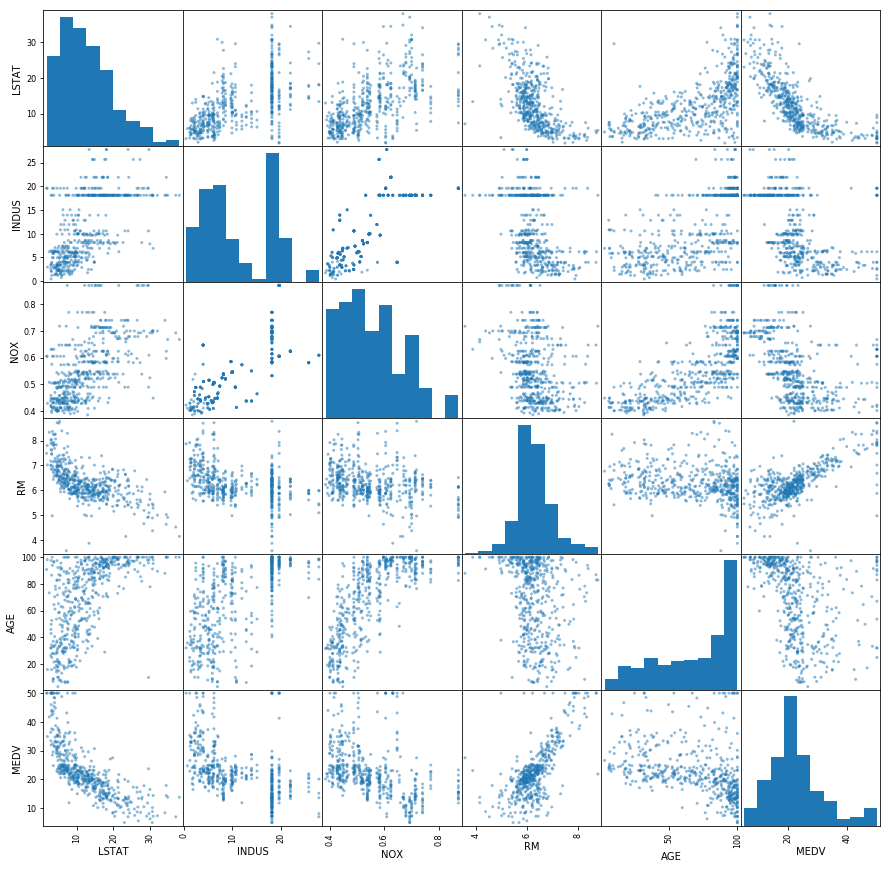

In [481]:
scatter_matrix(boston2,figsize=(15,15))
plt.show

In [482]:
cm = numpy.corrcoef(boston2,rowvar=False)
cm

array([[ 1.        ,  0.60379972,  0.59087892, -0.61380827,  0.60233853,
        -0.73766273],
       [ 0.60379972,  1.        ,  0.76365145, -0.39167585,  0.64477851,
        -0.48372516],
       [ 0.59087892,  0.76365145,  1.        , -0.30218819,  0.7314701 ,
        -0.42732077],
       [-0.61380827, -0.39167585, -0.30218819,  1.        , -0.24026493,
         0.69535995],
       [ 0.60233853,  0.64477851,  0.7314701 , -0.24026493,  1.        ,
        -0.37695457],
       [-0.73766273, -0.48372516, -0.42732077,  0.69535995, -0.37695457,
         1.        ]])

In [483]:
corr_m = pd.DataFrame(cm,columns=list(boston2.columns.values),index=list(boston2.columns.values))

In [484]:
corr_m

,LSTAT,INDUS,NOX,RM,AGE,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,0.602339,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,0.644779,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,0.731470,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,-0.240265,0.695360
AGE,0.602339,0.644779,0.731470,-0.240265,1.000000,-0.376955
MEDV,-0.737663,-0.483725,-0.427321,0.695360,-0.376955,1.000000


Las variables con mayor correlación positiva son:
- 'INDUS' con 'LSTAT'
- 'INDUS' con 'NOX'
- 'INDUS' con 'AGE'
- 'LSTAT' con 'AGE'
- 'NOX' con 'AGE'

Las variables con mayor correlación negativa son:
- 'LSTAT' con 'MEDV
- 'LSTAT' con 'AGE'
- 'LSTAT' con 'RM'

BONO: A continuación se muestra el heat map

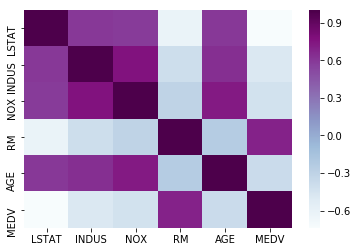

In [485]:
import seaborn as sns
sns.heatmap(cm,xticklabels=boston2.columns,
        yticklabels=boston2.columns,cmap="BuPu")

## 4.4 Modeling linear and non linear relationships

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$
* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $
* Train a linear regression model on both subsets of data:
     * Report the mean square error on the test set
     * Print the values of $ w $ and $ w_0 $ of the regression equation
     * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data
* How does the model perform on $ D_1 $ and $ D_2 $? Why?

In [486]:
d_1 = boston2[['RM','MEDV']]
d_2 = boston2[['LSTAT','MEDV']]

Se parte la muestra en train y test:

In [487]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1= train_test_split(d_1[['RM']], d_1[['MEDV']], random_state=1,test_size=0.3)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(d_2[['LSTAT']], d_2[['MEDV']], random_state=1,test_size=0.3)

print(X_train_1.shape)
print(y_train_1.shape)
print(X_test_2.shape)
print(y_test_1.shape)

(354, 1)
(354, 1)
(152, 1)
(152, 1)


Se ajustan los dos modelos de regresión lineal a las muestras de train:

In [488]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)

In [489]:
mod1 = linreg.fit(X_train_1, y_train_1)
pred1 = mod1.predict(X_test_1)
b1 =mod1.intercept_
c1 =mod1.coef_

In [490]:
mod2 = linreg.fit(X_train_2, y_train_2)
pred2 = mod2.predict(X_test_2)
b2 =mod2.intercept_
c2 =mod2.coef_

Se calcula el MSE para ambos modelos así como los coeficientes e interceptos :

In [491]:
from sklearn.metrics import mean_squared_error
mse_mod1 = mean_squared_error(y_test_1, pred1)
mse_mod2= mean_squared_error(y_test_2, pred2)

print('El MSE del modelo 1 es '+ str(mse_mod1))
print('El MSE del modelo 2 es '+ str(mse_mod2))
print('')
print('El intercepto del modelo 1 es '+ str(b1))
print('El coeficiente del modelo 1, correspondiente a la variable RM es '+ str(c1))
print('')
print('El intercepto del modelo 2 es '+ str(b2))
print('El coeficiente del modelo 2, correspondiente a la variable LSTAT es '+ str(c2))


El MSE del modelo 1 es 36.517214730838624
El MSE del modelo 2 es 42.62024347153971

El intercepto del modelo 1 es [-30.57103241]
El coeficiente del modelo 1, correspondiente a la variable RM es [[8.46109164]]

El intercepto del modelo 2 es [34.22183685]
El coeficiente del modelo 2, correspondiente a la variable LSTAT es [[-0.9166916]]


## Gráficas:

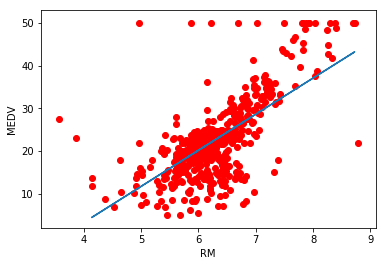

In [492]:
plt.scatter(X_test_1,y_test_1,color="red")
plt.scatter(X_train_1,y_train_1,color="red")
plt.ylabel("MEDV")
plt.xlabel("RM")

plt.plot(X_test_1,pred1)
plt.show()

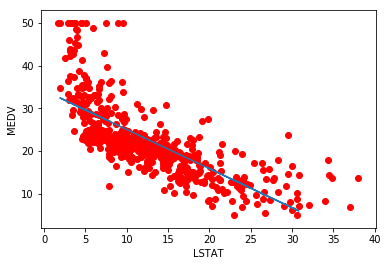

In [493]:
plt.scatter(X_test_2,y_test_2,color="red")
plt.scatter(X_train_2,y_train_2,color="red")
plt.plot(X_test_2,pred2)
plt.ylabel("MEDV")
plt.xlabel("LSTAT")
plt.show()

Las regresiones lineales funcionan bien para reflejar la tendencia del precio de las viviendas en función del número de habitaciones y del porcentaje de la población con bajo status: En el primer caso, a medida que hay más habitaciones, mayor es el precio. En el segundo, entre mayor es el porcentaje de personas con bajo status, menor es el precio. Sin embargo, al ser una línea recta se pierde precisión en la predicción ya que la relación no es necesariamente lineal. Esto se refleja en los errores calculados.

## 4.5 Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)
* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set
* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set
* Scale the data so that they have zero mean variance one per feature (only $ X $)
* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set
     3. Which model has better performance? Why?

## Regresión lineal

In [494]:
boston3 = boston.drop(columns=['MEDV'])
boston3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [495]:
X_train_3, X_test_3, y_train_3, y_test_3= train_test_split(boston3, boston2[['MEDV']], random_state=1,test_size=0.3)

In [496]:
X_train_3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
377,9.82349,0.0,18.10,0.0,0.671,6.794,98.8,1.3580,24.0,666.0,20.2,396.90,21.24
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12


In [497]:
y_train_3.head()

,MEDV
13,20.4
61,16.0
377,13.3
39,30.8
365,27.5


In [498]:
mod3 = linreg.fit(X_train_3, y_train_3)
pred3 = mod3.predict(X_test_3)
mse_mod3 = mean_squared_error(y_test_3, pred3)

In [499]:
print('El MSE del modelo 3 es '+ str(mse_mod3))

El MSE del modelo 3 es 19.829609248605163


## Regresión con MLPRegressor

In [500]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(activation="relu", solver="lbfgs",random_state=1)
mod4 = mlp.fit(X_train_3,y_train_3)
pred4 = mod4.predict(X_test_3)
mse_mod4 = mean_squared_error(y_test_3, pred4)


C:\Users\anmag\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [501]:
print('El MSE del modelo 4 es '+ str(mse_mod4))

El MSE del modelo 4 es 31.9815937120973


## Escalando los datos

In [502]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X_train_3)
sc_x.fit(X_test_3)

X_train_s = sc_x.transform(X_train_3)
X_test_s = sc_x.transform(X_test_3)

## Regresión lineal con los datos escalados

In [503]:
mod5 = linreg.fit(X_train_s, y_train_3)
pred5 = mod5.predict(X_test_s)
mse_mod5 = mean_squared_error(y_test_3, pred5)

In [504]:
print('El MSE del modelo 5 es '+ str(mse_mod5))

El MSE del modelo 5 es 19.829609248605063


## Regresión con MLPRegressor y datos escalados

In [505]:
mlp_s = MLPRegressor(hidden_layer_sizes=(128,512),activation="relu", solver="lbfgs",random_state=1)
mod6 = mlp_s.fit(X_train_s,y_train_3)
pred6 = mod6.predict(X_test_s)
mse_mod6 = mean_squared_error(y_test_3, pred6)

C:\Users\anmag\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [506]:
print('El MSE del modelo 6 es '+ str(mse_mod6))

El MSE del modelo 6 es 11.639768690609882


Resumiendo tenemos los siguientes MSE para los diferentes modelos trabajados:

In [507]:
print('El MSE de la regresión lineal con los datos sin escalar es '+ str(mse_mod3))
print('El MSE de la red neuronal con MLPRegressor con los datos sin escalar es '+ str(mse_mod4))
print('El MSE de la regresión lineal con los datos escalados es  '+ str(mse_mod5))
print('El MSE de la red neuronal con MLPRegressor con los datos escalados es '+ str(mse_mod6))

El MSE de la regresión lineal con los datos sin escalar es 19.829609248605163
El MSE de la red neuronal con MLPRegressor con los datos sin escalar es 31.9815937120973
El MSE de la regresión lineal con los datos escalados es  19.829609248605063
El MSE de la red neuronal con MLPRegressor con los datos escalados es 11.639768690609882


Se concluye que el mejor modelo es **la red neuronal construida con los datos escalados**, la cual reduce significativamente el error vs los modelos anteriores. Esto ocurre porque la red neuronal permite modelar las relaciones no lineales de los datos. Es de anotar que escalar los datos mejora ampliamente el error ya que los datos quedan en el rango en el que se mueve la función de activación. Si se compara con la regresión lineal, escalar los datos no tiene ningún impacto en el desempeño de estos modelos.